In [5]:
from cbir import CBIR
import cv2
import os
import networkx as nx
import cProfile

In [6]:
def profile(func, *args, **kwargs):
    pr = cProfile.Profile()
    pr.enable()
    func(*args, **kwargs)
    pr.disable()
    pr.print_stats(sort="tottime")
    return pr

In [7]:
cbir = CBIR("data/jpg", n_branches=3, depth=4, sift_implementation="pytorch")

In [8]:
cbir.fit()
cbir.index()

RuntimeError: Unable to get link info (addr overflow, addr = 57431568, size = 328, eoa = 57431296)

In [13]:
cbir.database

array([[0.01647778, 0.01647778, 0.0004859 , ..., 0.        , 0.        ,
        0.        ],
       [0.01643363, 0.01643363, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01781337, 0.01781337, 0.00016343, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01769327, 0.01769327, 0.00557962, ..., 0.        , 0.        ,
        0.        ],
       [0.01917699, 0.01917699, 0.0009988 , ..., 0.        , 0.        ,
        0.        ],
       [0.01722864, 0.01722864, 0.00754482, ..., 0.        , 0.        ,
        0.        ]])

In [4]:
cbir.fit()

Extracting features 1491/1491 from image 149902.jpg - ETA: 0.000000s
1239134 features extracted


In [5]:
cbir.index(parallel=False)


Generating index
Indexing image 1492/1491:  149902.jpg - ETA: 0.000000sss
Calculating weights
Inverted index generated


In [9]:
cbir.encode("104002", return_graph=False)

[0.01644594 0.01644594 0.         ... 0.         0.         0.        ]


In [ ]:
nx.draw(cbir.graph, with_labels=True)

In [ ]:
cbir.draw()

In [23]:
query = r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\120000.jpg"
scores = cbir.retrieve(query)

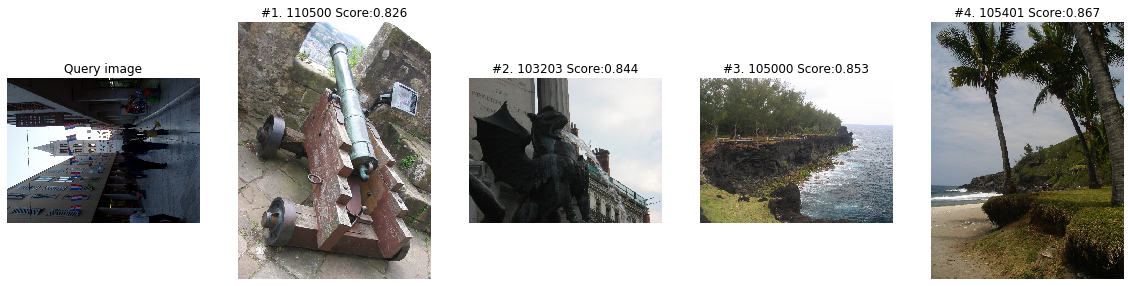

In [24]:
cbir.show_results(query, scores, n=4)

In [8]:
profile(cbir.retrieve, r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\104002.jpg")

         722016 function calls (708555 primitive calls) in 0.386 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    19424    0.079    0.000    0.115    0.000 {built-in method numpy.array}
    13459    0.042    0.000    0.103    0.000 linalg.py:2316(norm)
     2619    0.030    0.000    0.149    0.000 cbir.py:152(propagate_feature)
28413/14952    0.024    0.000    0.120    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
   143136    0.021    0.000    0.021    0.000 reportviews.py:259(<genexpr>)
        1    0.016    0.016    0.187    0.187 cbir.py:130(propagate)
     2982    0.015    0.000    0.145    0.000 cbir.py:172(encode)
    32154    0.014    0.000    0.018    0.000 graph.py:666(nodes)
     4476    0.009    0.000    0.019    0.000 ntpath.py:178(split)
    17892    0.008    0.000    0.009    0.000 reportviews.py:253(__iter__)
    13459    0.007    0.000    0.120    0.000 <__array_function__